<a href="https://colab.research.google.com/github/Deepthi-01997264/cs480student/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

     |████████████████████████████████| 7.4 MB 4.8 MB/s 


In [4]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [5]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 530GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** How many EEG channels were used when acquiring the data? [15 Points]


In [6]:
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

In [7]:
# We can see the 5th row here (chs). The number of Gradiometers is 294, Magnetometers is 102, Stimulus is 9, EEG is 60, and EOG is 1
print(raw.info)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


In [8]:
# We can also check channel names starting with 'EEG
len([x for x in raw.ch_names if x.startswith('EEG')])

60

***Task 1 Answer:*** So, as can bee seen in both the code block above, number of EEG channels used is 60.

**Task 2:** Let's look at some channels! [20 Points]

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


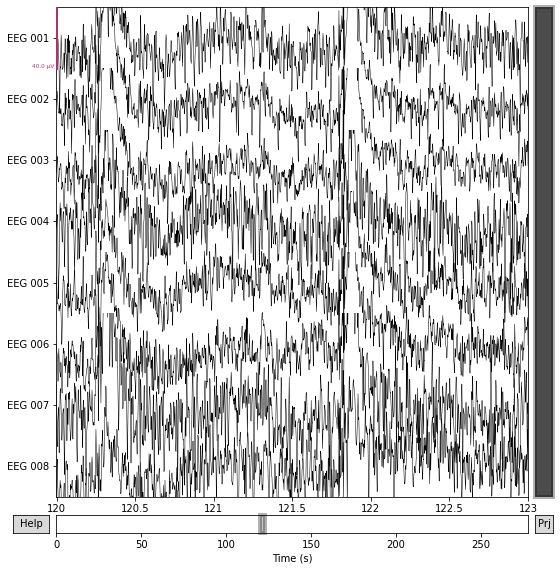

In [9]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [10]:
# TODO please plot EEG channels 50-60 for 1 second after 200 seconds.

***Task 2 answer below:***

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


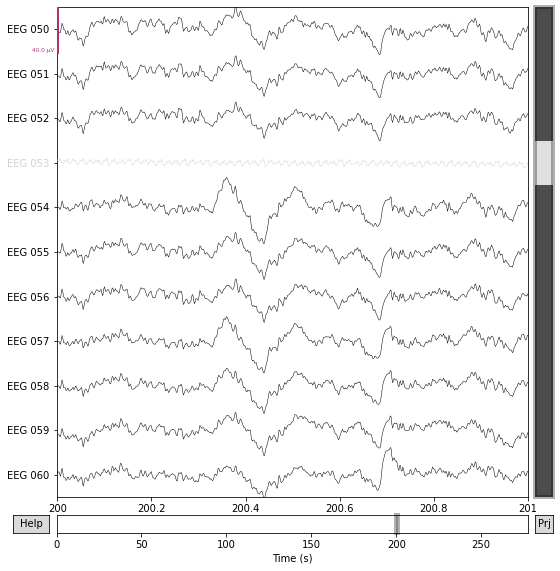

In [11]:
chs2 = ['EEG 050','EEG 051','EEG 052','EEG 053','EEG 054','EEG 055','EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs2 = [raw.ch_names.index(ch) for ch in chs2]
ecg50to60 = raw.plot(order=chan_idxs2, start=200, duration=1)

**Task 3:** How long between event and brain activity? [30 Points]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


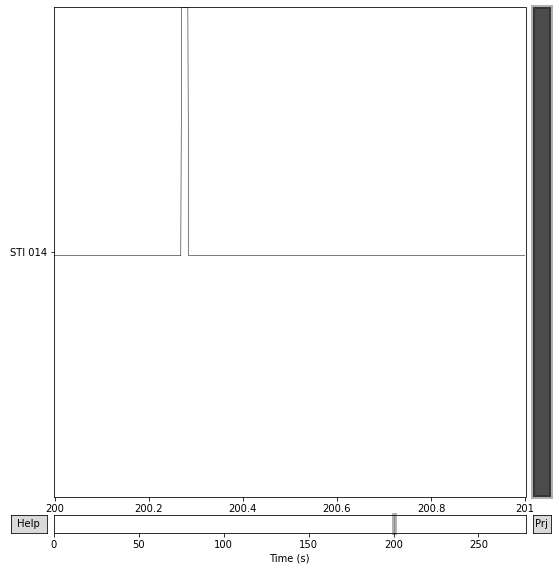

In [12]:
# the following code plots the stimulus channel for the same time
chan_idxs3 = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs3, start=200, duration=1)

In [13]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

***Task 3 Answer:*** The plot showing EEG channels 50-60 and the stimulus channel together is shown below:

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


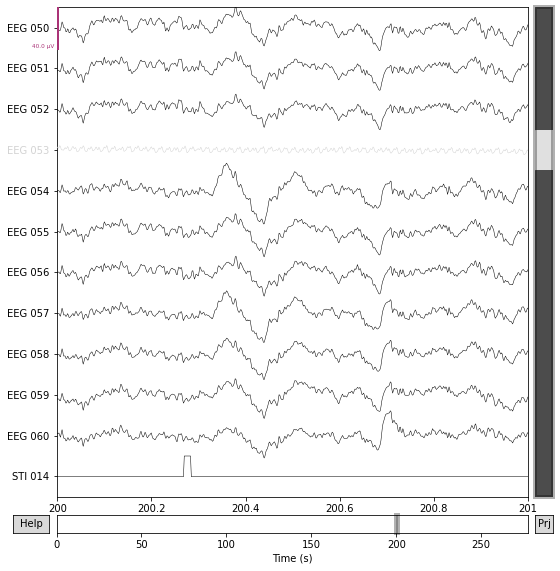

In [14]:
chan_idxs_combined = chan_idxs2 + chan_idxs3
ecgcombined = raw.plot(order=chan_idxs_combined, start=200, duration=1)

In [15]:
# TODO Please estimate the time between stimulus and brain activity.
# TODO: YOUR ANSWER

***Answer:*** . Let's say the time instant of stimulus is T1. We can find time for the maximum of the brain activity just after the stimulus , say T2 (We have to look from 200.2s to 200.6s as evident from plot above). For this, we can consider any EEG channel, say *'EEG 054'*.

T2 - T1 will the time between stimulus and brain activity.

In [16]:
import numpy as np
def give_max_time(channel_name,lower_limit, upper_limit):
  freq = raw.info['sfreq']
  start_stop_seconds = np.array([lower_limit, upper_limit])
  start_sample, stop_sample = (start_stop_seconds * freq).astype(int)
  channel_index = raw.ch_names.index(channel_name)
  raw_sel = raw[channel_index, start_sample:stop_sample]
  time = raw_sel[1]
  values = raw_sel[0][0]
  max_val = values[0]
  max_time = time[0]
  for i in range(len(values)):
    if values[i] > max_val:
      max_val = values[i]
      max_time = time[i]
  print("Maximium  for the channel " + channel_name  + " in the range " + str(lower_limit) + " to " + str(upper_limit) + " found at " + str(max_time))
  return max_time

In [17]:
T2 = give_max_time('EEG 054',200.2, 200.6)
T1 = give_max_time('STI 014',200.2, 200.6)
print(T2 - T1)

Maximium  for the channel EEG 054 in the range 200.2 to 200.6 found at 200.35963463556033
Maximium  for the channel STI 014 in the range 200.2 to 200.6 found at 200.26972678963904
0.08990784592128875


*Estimated Time Difference: 0.0899 seconds*

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [18]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


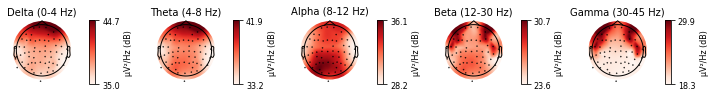

In [19]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


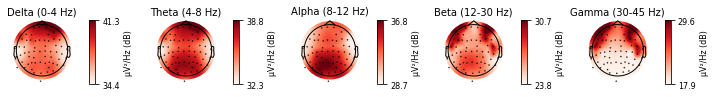

In [20]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/left'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


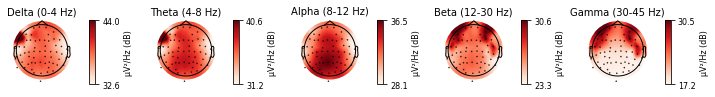

In [21]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [22]:
# TODO Please visualize the average brain activity when the subject pushes the button

**Task 4 answer:** The average brain activity when the subject pushes the button is shown below

    Using multitaper spectrum estimation with 7 DPSS windows


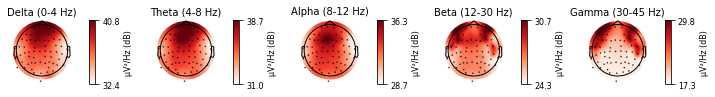

In [23]:
button_activity = epochs['button'].plot_psd_topomap()

In [24]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [25]:
# TODO Please go back to Task 3. Can you figure out which event type happened?

**Bonus Task Answer:** For this, we plot events alongside he raw data for 1 second after 200 seconds (As done in Task 3).

We can see the green line at the same time as the stimulus response peek. Also, green line correspondes to Event ID 4.

*Therefore, answer is Event 4: visual/right*

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


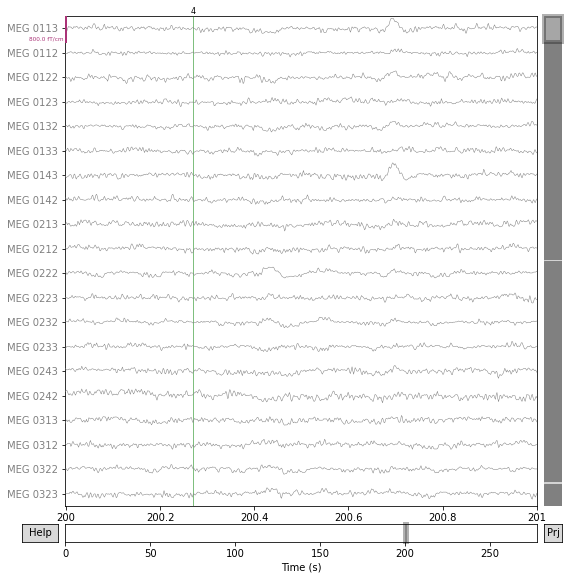

In [26]:
merged_plot = raw.plot(events=events, start=200, duration=1, color='gray', event_color={1: 'b', 2: 'm', 3: 'r', 4: 'g', 5: 'y', 32: 'k'})

In [27]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#
# Worked together with Anudeep Reddy Veerla